In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
#US data set
US = pd.read_csv('./USvideos.csv')
CA = pd.read_csv('./CAvideos.csv')
DE = pd.read_csv('./DEvideos.csv')
FR = pd.read_csv('./FRvideos.csv')

GB = pd.read_csv('./GBvideos.csv')
IN = pd.read_csv('./INvideos.csv')


# Unable to read the files, I think it is due to some of the characters
# JP = pd.read_csv('./JPvideos.csv')
# KR = pd.read_csv('./KRvideos.csv')

# MX = pd.read_csv('./MXvideos.csv')
# RU = pd.read_csv('./RUvideos.csv')


US_file = open('USvideos.csv', encoding='utf-8')
file_reader = csv.reader(US_file)
US_data = list(file_reader)
US_file.close()
header = US_data[0]
US_data = US_data[1:]


In [3]:
US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
US.shape
CA.shape
DE.shape
FR.shape
GB.shape
IN.shape

(37352, 16)

In [5]:
#alot of discriptions are null but should not affect the data set, check to see if null descriptions affect anything

US.isnull().sum()
CA.isnull().sum()
DE.isnull().sum()
FR.isnull().sum()
GB.isnull().sum()
IN.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [6]:
US[US['description'].isnull()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,17.15.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40125,1h7KV2sjUWY,18.10.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1021063,58806,376,3903,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40325,1h7KV2sjUWY,18.11.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1024052,58862,377,3904,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40538,1h7KV2sjUWY,18.12.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1029290,58980,377,3931,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40739,1h7KV2sjUWY,18.13.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1034480,59090,379,3927,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN


In [7]:
#drop description because it is not usefull and alot of the values are null
'''
US = US.drop(["description"], axis = 1)
CA = CA.drop(['description'], axis = 1)
DE = DE.drop(['description'], axis = 1)
FR = FR.drop(['description'], axis = 1)
GB = GB.drop(['description'], axis = 1)
IN = IN.drop(['description'], axis = 1)
'''

'\nUS = US.drop(["description"], axis = 1)\nCA = CA.drop([\'description\'], axis = 1)\nDE = DE.drop([\'description\'], axis = 1)\nFR = FR.drop([\'description\'], axis = 1)\nGB = GB.drop([\'description\'], axis = 1)\nIN = IN.drop([\'description\'], axis = 1)\n'

In [8]:
#droping other insignificant columns
'''
US = US.drop(["video_error_or_removed"], axis = 1)
US = US.drop(["ratings_disabled"], axis = 1)
CA = US.drop(["video_error_or_removed"], axis = 1)
CA = US.drop(["ratings_disabled"], axis = 1)
DE = US.drop(["video_error_or_removed"], axis = 1)
DE = US.drop(["ratings_disabled"], axis = 1)
FR = US.drop(["video_error_or_removed"], axis = 1)
FR = US.drop(["ratings_disabled"], axis = 1)
GB = US.drop(["video_error_or_removed"], axis = 1)
GB = US.drop(["ratings_disabled"], axis = 1)
IN = US.drop(["video_error_or_removed"], axis = 1)
IN = US.drop(["ratings_disabled"], axis = 1)


video_error_or_removed
ratings_disabled
'''



'\nUS = US.drop(["video_error_or_removed"], axis = 1)\nUS = US.drop(["ratings_disabled"], axis = 1)\nCA = US.drop(["video_error_or_removed"], axis = 1)\nCA = US.drop(["ratings_disabled"], axis = 1)\nDE = US.drop(["video_error_or_removed"], axis = 1)\nDE = US.drop(["ratings_disabled"], axis = 1)\nFR = US.drop(["video_error_or_removed"], axis = 1)\nFR = US.drop(["ratings_disabled"], axis = 1)\nGB = US.drop(["video_error_or_removed"], axis = 1)\nGB = US.drop(["ratings_disabled"], axis = 1)\nIN = US.drop(["video_error_or_removed"], axis = 1)\nIN = US.drop(["ratings_disabled"], axis = 1)\n\n\nvideo_error_or_removed\nratings_disabled\n'

In [9]:
def dropCategory(category):
    global US
    global CA
    global DE
    global FR
    global GB
    global IN
    
    US = US.drop([category], axis = 1)
    CA = CA.drop([category], axis = 1)
    DE = DE.drop([category], axis = 1)
    FR = FR.drop([category], axis = 1)
    GB = GB.drop([category], axis = 1)
    IN = IN.drop([category], axis = 1)
    
    return True

In [10]:
dropCategory('description')
dropCategory('video_error_or_removed')
dropCategory('ratings_disabled')
dropCategory('thumbnail_link')

True

In [11]:
US.head()
US

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False
...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,False
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False


In [12]:
#look at correalations between freq and views/likes
#also look into views resulting in likes
US.describe(include = 'all')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
count,40949,40949,40949,40949,40949.000000,40949,40949,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949
unique,6351,205,6455,2207,NaN,6269,6055,NaN,NaN,NaN,NaN,2
top,j4KvrAUjn6c,18.21.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,NaN,2018-05-18T14:00:04.000Z,[none],NaN,NaN,NaN,NaN,False
freq,30,200,30,203,NaN,50,1535,NaN,NaN,NaN,NaN,40316
mean,NaN,NaN,NaN,NaN,19.972429,NaN,NaN,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,NaN
std,NaN,NaN,NaN,NaN,7.568327,NaN,NaN,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,NaN
50%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,NaN
75%,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,NaN


In [13]:
#Try to visualize the correlation between views and likes

#sns.barplot(x = 'views', y = 'likes', data = df)

In [14]:
#drop the columns that we think are not necessary

In [15]:
US.corr(method = 'pearson')
US.corr(method = 'kendall')
US.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000


In [16]:
#df['views'].corrwith(df['likes'],asis = 1)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


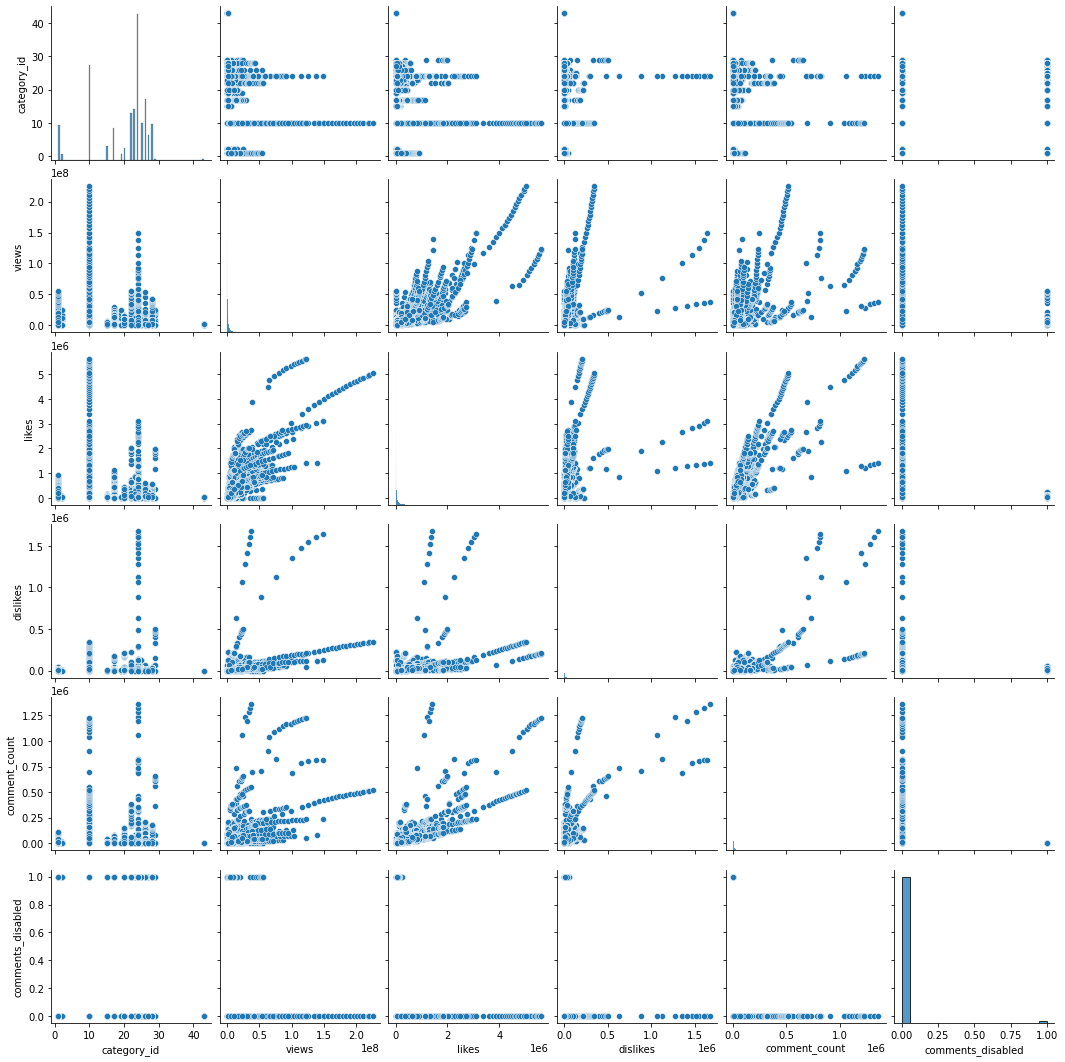

In [17]:
sns.pairplot(US, kind= "scatter")

In [18]:
US.views

0          748374
1         2418783
2         3191434
3          343168
4         2095731
           ...   
40944     1685609
40945     1064798
40946     1066451
40947     5660813
40948    10306119
Name: views, Length: 40949, dtype: int64

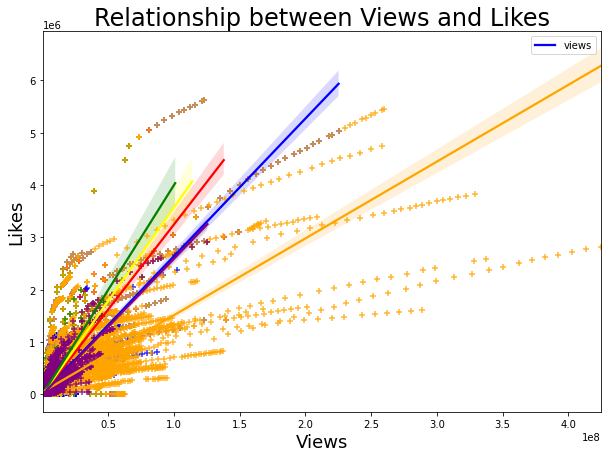

In [19]:
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=US.views, y=US.likes, color='blue', marker='+')
sns.regplot(x=CA.views, y=CA.likes, color='red', marker='+')
sns.regplot(x=DE.views, y=DE.likes, color='yellow', marker='+')
sns.regplot(x=FR.views, y=FR.likes, color='green', marker='+')
sns.regplot(x=GB.views, y=GB.likes, color='orange', marker='+')
sns.regplot(x=IN.views, y=IN.likes, color='purple', marker='+')

# Legend, title and labels.
plt.legend(labels=['views'])
plt.title('Relationship between Views and Likes', size=24)
plt.xlabel('Views', size=18)
plt.ylabel('Likes', size=18);

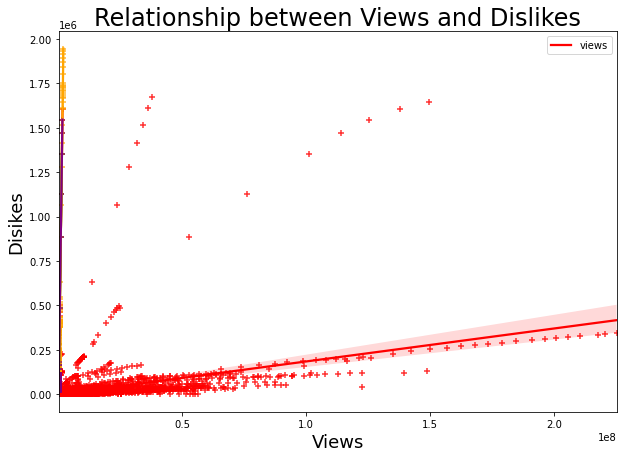

In [20]:
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=US.views, y=US.dislikes, color='red', marker='+')
sns.regplot(x=CA.dislikes, y=CA.dislikes, color='red', marker='+')
sns.regplot(x=DE.dislikes, y=DE.dislikes, color='yellow', marker='+')
sns.regplot(x=FR.dislikes, y=FR.dislikes, color='green', marker='+')
sns.regplot(x=GB.dislikes, y=GB.dislikes, color='orange', marker='+')
sns.regplot(x=IN.dislikes, y=IN.dislikes, color='purple', marker='+')

# Legend, title and labels.
plt.legend(labels=['views'])
plt.title('Relationship between Views and Dislikes', size=24)
plt.xlabel('Views', size=18)
plt.ylabel('Disikes', size=18);

<AxesSubplot:xlabel='category_id', ylabel='views'>

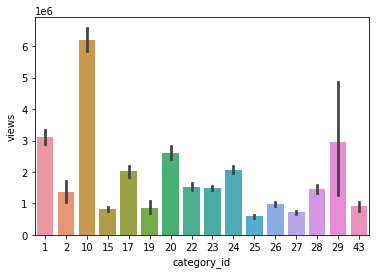

In [21]:
sns.barplot(x="category_id", y ="views", data = US)

<AxesSubplot:xlabel='category_id', ylabel='likes'>

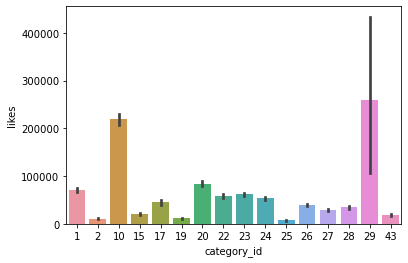

In [22]:
sns.barplot(x="category_id", y ="likes", data = US)

<AxesSubplot:xlabel='category_id', ylabel='dislikes'>

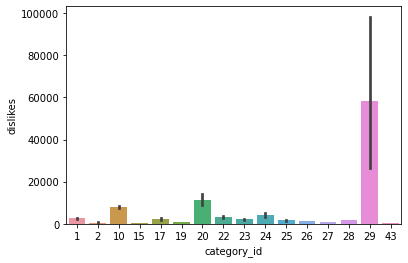

In [23]:
sns.barplot(x="category_id", y ="dislikes", data = US)

<AxesSubplot:xlabel='category_id', ylabel='dislikes'>

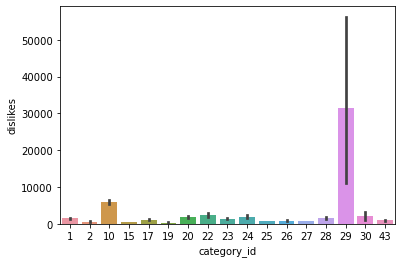

In [24]:
sns.barplot(x="category_id", y ="dislikes", data = CA)

In [25]:
#how often certain tags are used - look into parsing the strings and checking each individual tag
pd.crosstab(US.channel_title, US.tags, margins = True, margins_name = "Total")[-1:]

tags,"#MeToo|""Grammys 2018""|""Janelle Monáe""|""Kesha""","#NeighborDanceChallenge|""#neighbor""|""#dance""|""#loveyourneighbors""|""#dreamer""|""#dancing""|""#musicvideo""|""#love""|""#iphone8""|""#iMovie""|""#iTunes""","#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudToLove""|""#Pride2018""|""Pride""|""Pride 2018""|""#PrideMonth""|""Adam Rippon""|""Tyler Oakley""|""Janelle Monae""|""Lena Waithe""|""PatrickStarrr""|""ConnerFranta""|""MyHarto""|""Jay Versace""|""Mykki Blanco""|""Big Freedia""|""ASAPScience""|""Hayley Kiyoko""|""Team2Moms""|""TodrickHall""|""Sasha Velour""|""Peppermint""|""Alexis Michelle""|""Aja Kween""|""LGBTQ""|""LGBTQPride""|""youtube""|""proud""|""trans""|""queer""|""lesbian""|""gay""|""pride""",#guitar #musiciseverywhere #jammin #meme #funny #deeppurple #pinkfloyd,"#safarilive|""#safarilive nat geo wild""|""safarilive""|""nat geo wild livestream""|""Maasai Mara""|""wild animals live""|""nat geo wild""|""national geographic""|""wild""|""wildlife""|""animals""|""nat geo""|""natgeo""|""science""|""discover""|""nature""|""documentary""|""explore""|""survival""|""lions""|""zebra""|""gators""|""crocodiles""|""wildebeest""|""elephant""|""giraffes""|""plnxd9fyeqxey0fs9bykxwimyswobm6y6g""|""safari live""|""safari""|""live safari""|""nat geo safari""|""nat geo wild safari live""|""nat geo wild safari""|""safari live stream""|""safari live day 81""|""new cheetah""","#treasure|""scuba diving for treasure""|""finding buried treasure""|""treasure in pond""|""sharer treasure hunt""|""buried treasure""|""finding treasure""|""scuba diving""|""underwater treasure""|""treasure chest""|""we found a treasure""|""scuba diving in pond""|""scuba""|""treasure hunting""|""stephen""|""exploring""|""carter sharer""|""stephen sharer""|""sharer fam""|""sharer bros""|""hunting""|""treasure in lake""|""treasure""|""share the love""|""carter""|""real treasure hunt""","#whopper|""#fastfood""|""#burgers""|""#chocolate""|""#chocolatelovers""|""#foodporn""|""#burgerking""|""#chocolateart""|""#aprilfools""|""#brandaprilfools""","#youtubeblack|""wendy williams""|""the wendy williams show""|""the chi""|""showtime""|""lena waithe""","$1000 Survival Kit|""Survival Kit in a Case""|""pelican case""|""pelican case survival kit""|""emergency survival kit""|""emergency kit""|""$1000""|""$1000 mystery box""|""$1000 survival case""|""unboxing survival box""|""Survival Kit Unboxing""|""unboxing""|""crazyrussianhacker""|""taras kul""","$10|""less than $10""|""living on $10""|""living on $10 a day""|""$10 a day""|""10 dollars""|""ten""|""ten dollars""|""cheap""|""under $10""|""under ten""|""under 10""|""dollar""|""budget""|""gadget""|""under""|""cheapest""|""cheapest hotels""|""cheapest travel""|""cheap travel""|""cheap living""|""backpacking""|""bargain""|""travel tips""|""inexpensive""|""budget travel""|""tourism""|""travel""|""affordable""|""cheapest countries in the world""|""cheapest places to live""|""$10 travel challenge""|""how to travel cheap""|""the infographics show""|""theinfographicsshow""",...,"ニンジャバットマン|""batman ninja""|""batman""|""神風動画""|""水﨑淳平""|""中島かずき""|""岡崎能士""|""DC""|""バットマン""","周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""袁詠琳""|""cindy""|""yen""|""官方""|""高清""|""不愛我就拉倒""|""繁體""|""浩克""|""彈頭""","東京サム|""jvlog""|""jvlogger""|""tkyosam""|""tokyo""|""sam""|""japan""|""gaijin""|""vlog""|""japan vlog""|""real talk""|""english""|""teaching""|""in""|""asia""|""black black""|""stay black""|""Tokyo""|""study japanese""|""東京""|""外人""|""tokyosam""|""japanese sushi""|""jiro loves sushi""|""viral japanese video""|""ikebukuro""|""stupid tourists""|""fun in japan""|""japanese conveyor belt sushi""|""eating food""|""japanese food""|""japanese street food""|""seafood""|""sashimi""|""トータルテンボス""|""sushi★boys""|""gopro""|""japanese tourism""","방탄소년단|""BTS""|""2017 MAMA""|""2017마마""|""MAMA""|""마마""|""Mnet""|""엠넷""|""Mnet Asian Music Awards""","방탄소년단|""BTS""|""BANGTAN""|""HIPHOP""|""랩몬스터""|""RapMonster""|""슈가""|""SUGA""|""제이홉""|""jhope""|""지

In [26]:
US.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled'],
      dtype='object')

In [27]:
def cell(row_idx, col_name):
    col_idx = header.index(col_name)
    val = US_data[row_idx][col_idx]
    if val == "":
        return None
    
    
    return val

In [28]:
tag_usage = {}
for idx in range(len(US_data)):
    tags = cell(idx, 'tags').split('|')
    for i in tags:
        if(not i in tag_usage):
            tag_usage[i] = 1
        else:
            tag_usage[i] += 1
tag_usage

{'SHANtell martin': 7,
 'last week tonight trump presidency': 7,
 '"last week tonight donald trump"': 7,
 '"john oliver trump"': 7,
 '"donald trump"': 174,
 'racist superman': 19,
 '"rudy"': 81,
 '"mancuso"': 73,
 '"king"': 52,
 '"bach"': 36,
 '"racist"': 20,
 '"superman"': 66,
 '"love"': 419,
 '"rudy mancuso poo bear black white official music video"': 17,
 '"iphone x by pineapple"': 7,
 '"lelepons"': 329,
 '"hannahstocking"': 325,
 '"rudymancuso"': 325,
 '"inanna"': 306,
 '"anwar"': 313,
 '"sarkis"': 306,
 '"shots"': 329,
 '"shotsstudios"': 313,
 '"alesso"': 325,
 '"anitta"': 312,
 '"brazil"': 305,
 '"Getting My Driver\'s License ': 7,
 ' Lele Pons"': 43,
 'rhett and link': 164,
 '"gmm"': 130,
 '"good mythical morning"': 154,
 '"rhett and link good mythical morning"': 144,
 '"good mythical morning rhett and link"': 144,
 '"mythical morning"': 147,
 '"Season 12"': 36,
 '"nickelback lyrics"': 7,
 '"nickelback lyrics real or fake"': 7,
 '"nickelback"': 7,
 '"nickelback songs"': 7,
 '"ni

In [29]:
channel_views = {}
for idx in range(len(US_data)):
    if(not cell(idx, 'channel_title') in channel_views):
        channel_views[cell(idx, 'channel_title')] = int(cell(idx, 'views'))
    else:
        channel_views[cell(idx, 'channel_title')] += int(cell(idx, 'views'))
channel_views
channel_views = dict(reversed(sorted(channel_views.items(), key=lambda item: item[1])))

top20Channels = []
for value in channel_views:
    top20Channels.append(value)
    
top20Channels = top20Channels[0:20]
top20Channels

['ChildishGambinoVEVO',
 'ibighit',
 'Dude Perfect',
 'Marvel Entertainment',
 'ArianaGrandeVevo',
 'MalumaVEVO',
 'jypentertainment',
 'Sony Pictures Entertainment',
 'FoxStarHindi',
 'BeckyGVEVO',
 '20th Century Fox',
 'CalvinHarrisVEVO',
 'Ed Sheeran',
 'Cardi B',
 'TaylorSwiftVEVO',
 'Universal Pictures',
 'ZaynVEVO',
 'Disney•Pixar',
 'JenniferLopezVEVO',
 'Selena Gomez']

In [30]:
channel_categories = {}
for idx in range(len(US_data)):
    if(cell(idx, 'channel_title') in top20Channels):
        channel_categories[cell(idx, 'channel_title')] = int(cell(idx, 'category_id'))
        
channel_categories

{'20th Century Fox': 1,
 'JenniferLopezVEVO': 10,
 'Ed Sheeran': 10,
 'ibighit': 10,
 'Disney•Pixar': 1,
 'Marvel Entertainment': 24,
 'Sony Pictures Entertainment': 24,
 'Universal Pictures': 24,
 'Dude Perfect': 17,
 'jypentertainment': 10,
 'TaylorSwiftVEVO': 10,
 'Cardi B': 10,
 'CalvinHarrisVEVO': 10,
 'MalumaVEVO': 10,
 'ZaynVEVO': 10,
 'BeckyGVEVO': 10,
 'ArianaGrandeVevo': 10,
 'FoxStarHindi': 24,
 'ChildishGambinoVEVO': 10,
 'Selena Gomez': 1}

In [31]:
category_views = {}
for idx in range(len(US_data)):
    if(not cell(idx, 'category_id') in category_views):
        category_views[cell(idx, 'category_id')] = int(cell(idx, 'views'))
    else:
        category_views[cell(idx, 'category_id')] += int(cell(idx, 'views'))

category_views = dict(reversed(sorted(category_views.items(), key=lambda item: item[1])))

top20Categories = []
for value in category_views:
    top20Categories.append(value)
    
top20Categories = top20Categories[0:20]
top20Categories

['10',
 '24',
 '1',
 '23',
 '22',
 '17',
 '26',
 '28',
 '20',
 '25',
 '27',
 '15',
 '2',
 '19',
 '29',
 '43']

In [32]:
common_words = {}
for idx in range(len(US_data)):
    words = cell(idx, 'title').split()
    for i in words:
        if(not i in common_words):
            common_words[i] = 1
        else:
            common_words[i] += 1
    

common_words = dict(reversed(sorted(common_words.items(), key=lambda item: item[1])))

top20words = []
for value in common_words:
    top20words.append(value)
    
top20words = top20words[0:20]
top20words

common_words

{'-': 11452,
 '|': 10663,
 'The': 5762,
 'the': 3610,
 'a': 2566,
 'to': 2343,
 'of': 2338,
 'in': 2176,
 'A': 2122,
 '&': 2024,
 'I': 1940,
 'and': 1917,
 'Video)': 1901,
 'Trailer': 1868,
 'How': 1661,
 'with': 1655,
 '2018': 1613,
 '(Official': 1594,
 'Official': 1554,
 'on': 1552,
 'To': 1397,
 'You': 1254,
 'My': 1080,
 'for': 1020,
 'ft.': 1017,
 'In': 943,
 'With': 897,
 'Is': 828,
 'at': 826,
 'What': 773,
 'MY': 739,
 'Music': 703,
 '2017': 683,
 '2': 675,
 'is': 660,
 'On': 659,
 'Why': 657,
 'This': 613,
 'Me': 599,
 'New': 575,
 'THE': 571,
 'from': 570,
 'For': 560,
 'TO': 537,
 'It': 536,
 'We': 535,
 '[Official': 517,
 'From': 513,
 'Of': 505,
 'Game': 504,
 'First': 497,
 'by': 489,
 '10': 479,
 'Show': 469,
 '5': 464,
 'Day': 461,
 'Star': 452,
 'Black': 447,
 '[HD]': 445,
 'Make': 444,
 'Teaser': 441,
 '(Audio)': 427,
 'Your': 415,
 'vs.': 414,
 'MAKEUP': 410,
 'Movie': 410,
 'Out': 401,
 '–': 392,
 'Super': 386,
 'Makeup': 386,
 'About': 382,
 'Season': 377,
 '(Lyric

In [33]:
# Not that many ways to find relationships between categorical variables as most variables are Numerical

In [34]:
'''
I identified that a lot of descriptions were null so I dropped that column. I also dropped the columns: video_error_or_removed,
ratings_disabled, thumbnail_link. I dropped them as it would simplify the data as those columns are not that useful.


Some preliminary trends that I identified is that in general videos that views had a positive linear correlation 
with the number of likes -> more views = more likes

However, this is not the same for the relationship between views and dislikes. In the US there was a positive linear relationship
between the two categories but for most other countries videos that had much fewer views had much more dislikes when compared to
the views and likes relationship

I also identified that certain categories have more polar viewpoints when compared to others and were viewed more often.
Category 10 and 29 had more likes in general and category 29 tended to have more dislikes in general

I was also able to identify that certain tags are used more often and if I had more time I would create a plot to see the
correlation between the tags used and the category_id or views

I also found the channels that got the most views did not necessarily have categorie_id's that had the most views. Most of the
top channels were from category 10.

I also found that most of the top words used in titles were syncategorematic words which makes sense as those words are 
required to create a coherent title
'''

"\nI identified that a lot of descriptions were null so I dropped that column. I also dropped the columns: video_error_or_removed,\nratings_disabled, thumbnail_link. I dropped them as it would simplify the data as those columns are not that useful.\n\n\nSome preliminary trends that I identified is that in general videos that views had a positive linear correlation \nwith the number of likes -> more views = more likes\n\nHowever, this is not the same for the relationship between views and dislikes. In the US there was a positive linear relationship\nbetween the two categories but for most other countries videos that had much fewer views had much more dislikes when compared to\nthe views and likes relationship\n\nI also identified that certain categories have more polar viewpoints when compared to others and were viewed more often.\nCategory 10 and 29 had more likes in general and category 29 tended to have more dislikes in general\n\nI was also able to identify that certain tags are use